In [10]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import string

## Data Setup

In [207]:
# Set of possible values.
VALS = list(string.ascii_uppercase)

N = 1000

# Proportion of rows which should have the same value in both columns.
PCT_EQ = 0.5

# Generate a dataframe with PCT_EQ of rows having the same value in both columns.
rows = []
for i in range(N):
    if i < N * PCT_EQ:
        val = np.random.choice(VALS)
        rows.append((val, val))
    else:
        rows.append(tuple(np.random.choice(VALS, size=2, replace=False)))
        
df = pl.DataFrame(np.array(rows, dtype=[("foo", "U1"), ("bar", "U1")]))

df.select((pl.col("foo") == pl.col("bar")).alias("foo == bar")).to_series().value_counts()

foo == bar,counts
bool,u32
false,500
true,500


## Permutation Testing

#### Notes: 

  - Null hypothesis: foo and bar are independent.

Observed statistic: 0.5
p-value is 1.0


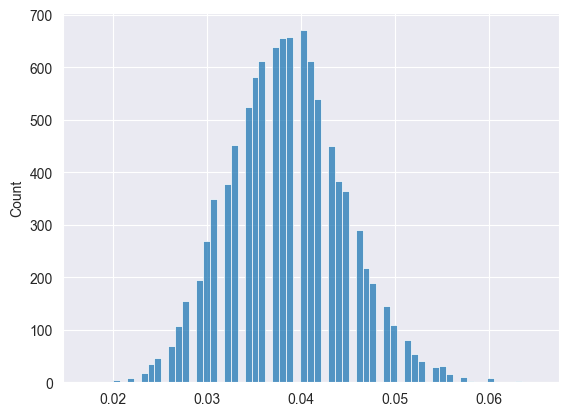

In [211]:
# Number of permutations to perform.
N_PERMS = 10000

obs_stat = df.select(pl.col("foo") == pl.col("bar")).sum().item() / N
print(f"Observed statistic: {obs_stat}")

perm_stats = []
for i in range(N_PERMS):
    # Test statistic is the number of rows where foo == bar.
    perm_stat = df.select(pl.col("foo") == pl.col("bar").shuffle()).sum().item() / N
    perm_stats.append(perm_stat)
    
sns.histplot(perm_stats)

# Count the number of cases where bs_stat exceeds obs_stat.
extreme_count = np.sum(obs_stat >= np.array(perm_stats))

print(f"p-value is {extreme_count / N_PERMS}")

In [210]:
perm_stats[:10]

[0.036, 0.038, 0.035, 0.032, 0.029, 0.047, 0.041, 0.039, 0.044, 0.04]

In [262]:
null_proportion = 0.9
obs_proportion = 0.95
n = 10000

print(expected_true)
p_value = np.sum(np.random.binomial(n, null_proportion, size=n)/n >= obs_proportion) / n
print(f"P-value: {p_value:.4f}")

9000.0
P-value: 0.0000


In [ ]:
def binom_test(len_data, null_pct, obs_pct):
    return np.sum(np.random.binomial(len_data, null_pct, size=len_data)/n >= obs_pct) / len_data

null_pct = 0.8
len_data = 10000
xs = np.arange(null_pct - 0.1, 1.0, 0.001)
ys = np.array([binom_test(len_data, null_pct, x) for x in xs])
    
sns.lineplot(x=xs, y=ys)

In [271]:
ys

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])